In [94]:
import pickle
import sys
import os
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

sys.path.append(".")

from itertools import product
from pathlib import Path
from typing import Tuple, Dict, NewType, List

***

In [92]:
def get_runs(path: str):
    return [x for x in os.listdir(path) if "run" in x]

Figure = NewType('Figure', matplotlib.figure.Figure)
Axis   = NewType('Figure', matplotlib.axes.Axes)

def heat_plot(X: np.array, size: Tuple[int] = None,
              x_tick_labels: List[str] = None,
              y_tick_labels: List[str] = None,
              cmap: str = None,
              cbar: bool = False,
              fig: Figure = None,
              ax: Axis = None) -> Tuple[Figure, Axis]:
    if fig == None and ax == None:
        fig, ax = plt.subplots(1, 1)
        if size != None:
            fig.set_size_inches(size)
        else:
            fig.set_size_inches(w = 15, h = 10)
    
    sns.heatmap(X, linewidth = 0, ax = ax, cmap = cmap, cbar = cbar)
    
    ax.locator_params('x', nbins = 3)
    ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
    
    if x_tick_labels != None:
        ax.set_xticklabels(x_tick_labels)
    if y_tick_labels != None:
        ax.set_yticklabels(y_tick_labels)
    
    return fig, ax

def get_mean_stats(param_list: Dict, results_path: str, T: int) -> Dict:
    mean_stats = {}
        
    for param in product(*param_list.values()):
        input_path = Path(results_path) / str(param)
        try:
            runs = get_runs(input_path)
        except:
            continue
        
        mean_run_stats = {
            "Entropy": np.zeros(T),
            "Proximity": np.zeros(T),
            "Polarity": np.zeros(T),
            "Distribution": np.zeros((32, T))
        }
        
        num_runs = len(runs)
        
        for run in runs:
            stats = pickle.load(open(input_path / run, "rb"))
            mean_run_stats['Entropy'] += stats['Entropy']
            mean_run_stats['Proximity'] += stats['Proximity']
            mean_run_stats['Polarity'] += stats['Polarity']
            mean_run_stats['Distribution'] += np.array(stats['Distribution']).T
            
        mean_run_stats['Entropy'] /= num_runs
        mean_run_stats['Proximity'] /= num_runs
        mean_run_stats['Polarity'] /= num_runs
        mean_run_stats['Distribution'] /= num_runs
        
        mean_stats[param] = mean_run_stats
        
    return mean_stats

***

In [64]:
# Experiment's setup

param_list = {
    "graph_type": ["regular"],
    "network_size": [50],
    "memory_size": [160],
    "code_length": [5],
    "kappa": [0, 15, 30],
    "lambda": [0, 0.1, 0.3, 1, 5],
    "alpha": [1, 0.8, 0.6, 0.4, 0.2],
    "omega": [0, 0.2, 0.4, 0.6, 0.8],
    "gamma": [-10, 0, 10],
    "degree": [5, 15, 30],
    "prefferential_att": [2]
}

simulated_params = [x for x in os.listdir('../results/experiment_regular_with_polarization') if '(' in x]

In [67]:
mean_stats = get_mean_stats(param_list, "../results/experiment_regular_with_polarization", T = 500)

### 1 grupo polarizado X grupo neutro

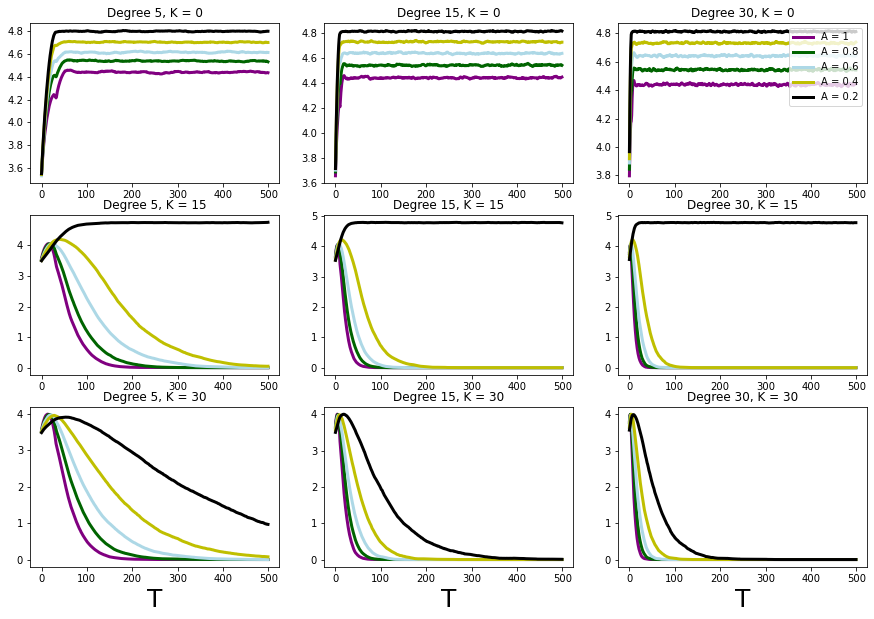

In [78]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 10))
fig.subplots_adjust(wspace = 0.18)
for ax in axs[2]:
    ax.set_xlabel("T", fontsize = 25)
    
colors = {
    1: "purple",
    0.8: "darkgreen",
    0.6: "lightblue",
    0.4: "y",
    0.2: "k"
}

style = {
    0: '--',
    15: '-',
    30: ':'
}

alpha = [1, 0.8, 0.6, 0.4, 0.2]
degree = [5, 15, 30]


for i in range(len(alpha)):
    for k in range(len(degree)):
        for j in range(len(param_list['kappa'])):
            param = ("regular", 50, 160, 5, param_list['kappa'][j], 0, alpha[i], 0, 0, degree[k], 2)

            results = mean_stats[param]
            mean_entropy = results['Entropy']
            X = range(len(mean_entropy))

            axs[j][k].plot(X, mean_entropy, label = f'A = {alpha[i]}', color = colors[alpha[i]], linewidth = 3)

            axs[j][k].set_title(f"Degree {degree[k]}, K = {param_list['kappa'][j]}")
            
axs[0][2].legend(fontsize = 10, loc = 1)

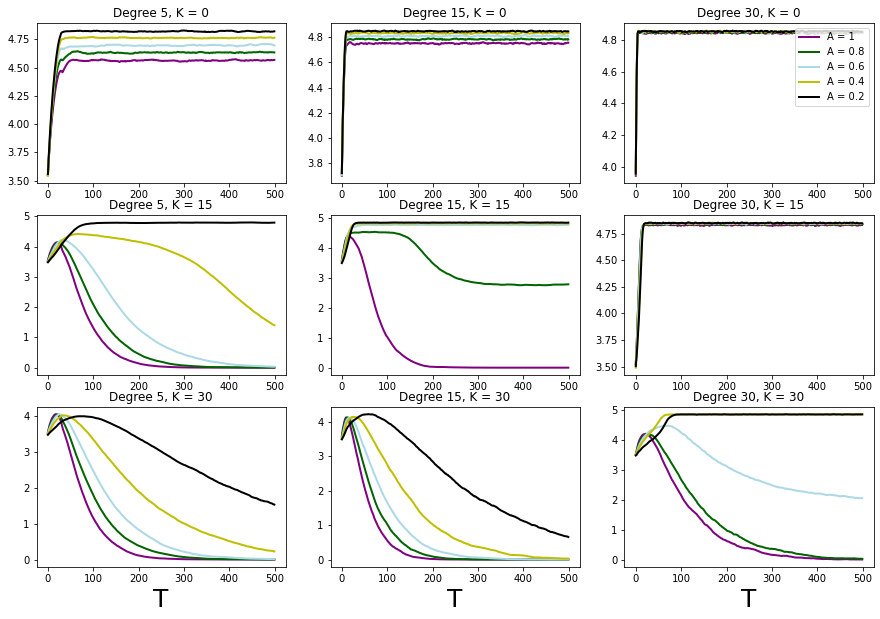

In [79]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 10))
fig.subplots_adjust(wspace = 0.18)
for ax in axs[2]:
    ax.set_xlabel("T", fontsize = 25)
    
colors = {
    1: "purple",
    0.8: "darkgreen",
    0.6: "lightblue",
    0.4: "y",
    0.2: "k"
}

style = {
    0: '--',
    15: '-',
    30: ':'
}
alpha = [1, 0.8, 0.6, 0.4, 0.2]
degree = [5, 15, 30]


for i in range(len(alpha)):
    for k in range(len(degree)):
        for j in range(len(param_list['kappa'])):
            param = ("regular", 50, 160, 5, param_list['kappa'][j], 0.1, alpha[i], 0, 0, degree[k], 2)

            results = mean_stats[param]
            mean_entropy = results['Entropy']
            X = range(len(mean_entropy))

            axs[j][k].plot(X, mean_entropy, label = f'A = {alpha[i]}', color = colors[alpha[i]], linewidth = 2)

            axs[j][k].set_title(f"Degree {degree[k]}, K = {param_list['kappa'][j]}")
            
axs[0][2].legend(fontsize = 10, loc = 1)

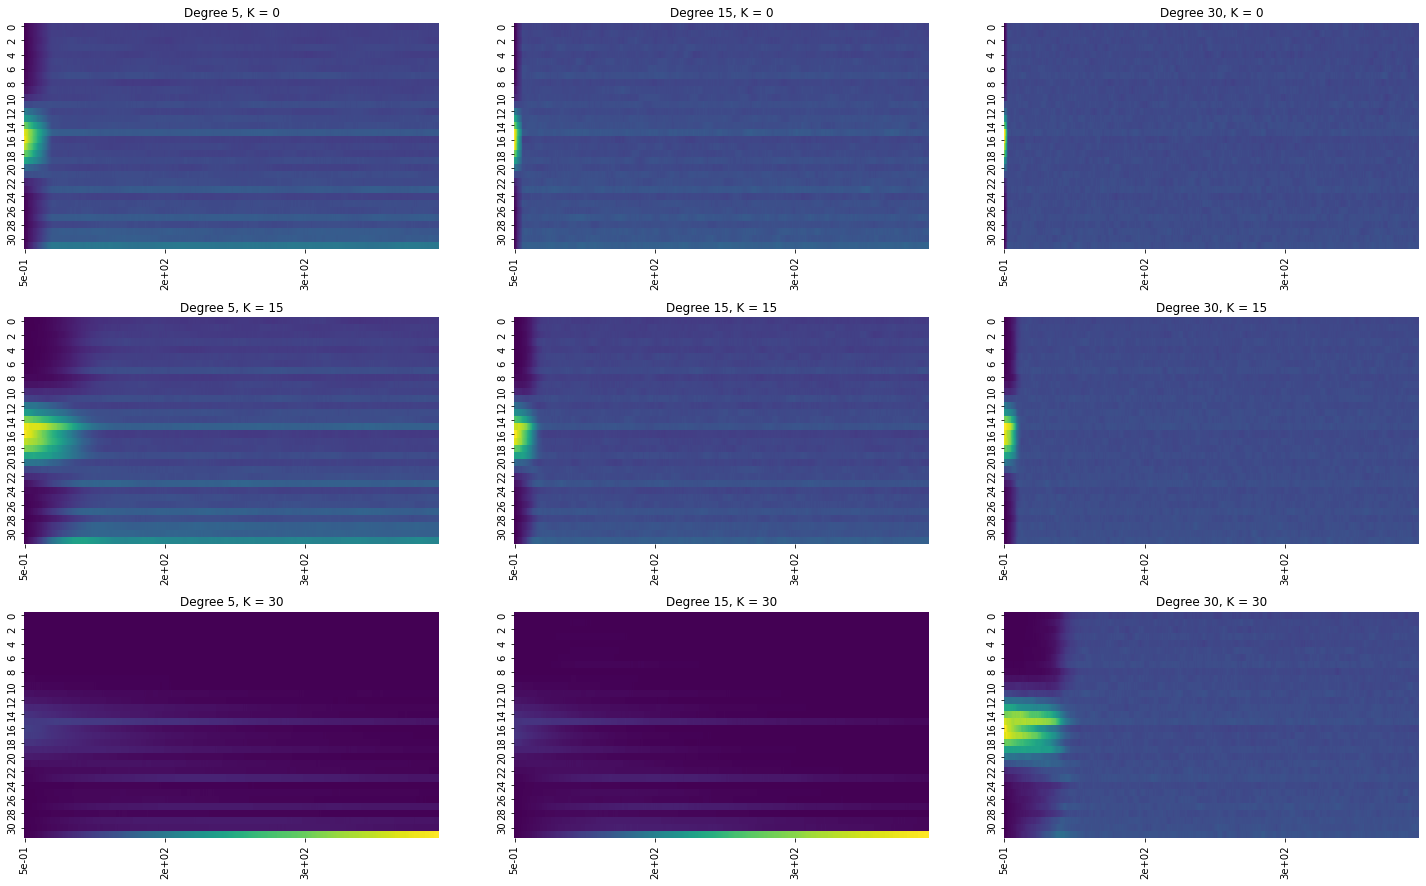

In [104]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (25, 15))
fig.subplots_adjust(wspace = 0.18, hspace = 0.3)
for ax in axs[2]:
    ax.set_xlabel("T", fontsize = 25)
    
colors = {
    1: "purple",
    0.8: "darkgreen",
    0.6: "lightblue",
    0.4: "y",
    0.2: "k"
}

style = {
    0: '--',
    15: '-',
    30: ':'
}

alpha = 0.2
degree = [5, 15, 30]

for k in range(len(degree)):
    for j in range(len(param_list['kappa'])):
        param = ("regular", 50, 160, 5, param_list['kappa'][j], 0.1, alpha, 0, 0, degree[k], 2)

        _, ax = heat_plot(mean_stats[param]['Distribution'], cmap = 'viridis', fig = fig, ax = axs[j][k])

        ax.set_title(f"Degree {degree[k]}, K = {param_list['kappa'][j]}")

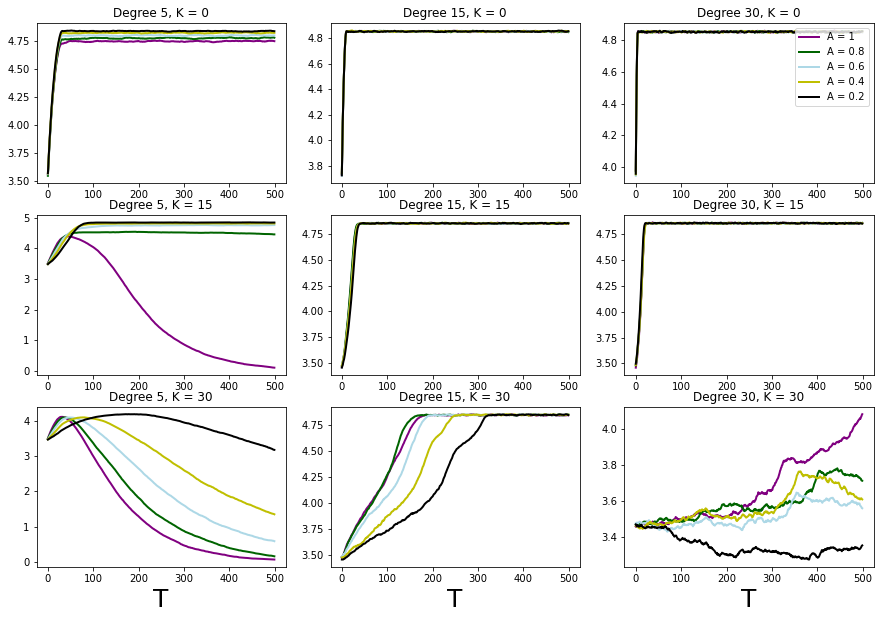

In [80]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 10))
fig.subplots_adjust(wspace = 0.18)
for ax in axs[2]:
    ax.set_xlabel("T", fontsize = 25)
    
colors = {
    1: "purple",
    0.8: "darkgreen",
    0.6: "lightblue",
    0.4: "y",
    0.2: "k"
}

style = {
    0: '--',
    15: '-',
    30: ':'
}
alpha = [1, 0.8, 0.6, 0.4, 0.2]
degree = [5, 15, 30]


for i in range(len(alpha)):
    for k in range(len(degree)):
        for j in range(len(param_list['kappa'])):
            param = ("regular", 50, 160, 5, param_list['kappa'][j], 0.3, alpha[i], 0, 0, degree[k], 2)

            results = mean_stats[param]
            mean_entropy = results['Entropy']
            X = range(len(mean_entropy))

            axs[j][k].plot(X, mean_entropy, label = f'A = {alpha[i]}', color = colors[alpha[i]], linewidth = 2)

            axs[j][k].set_title(f"Degree {degree[k]}, K = {param_list['kappa'][j]}")
            
axs[0][2].legend(fontsize = 10, loc = 1)

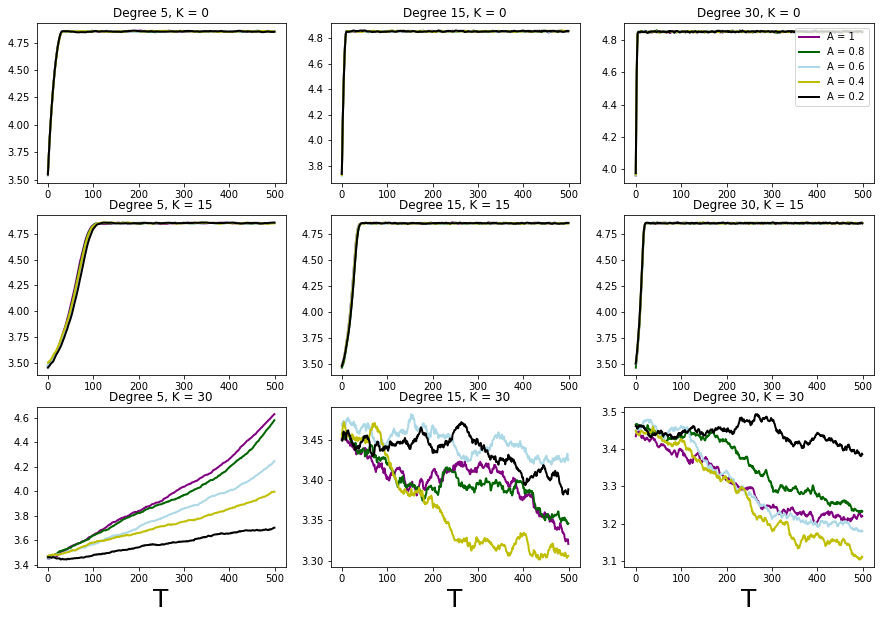

In [81]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 10))
fig.subplots_adjust(wspace = 0.18)
for ax in axs[2]:
    ax.set_xlabel("T", fontsize = 25)
    
colors = {
    1: "purple",
    0.8: "darkgreen",
    0.6: "lightblue",
    0.4: "y",
    0.2: "k"
}

style = {
    0: '--',
    15: '-',
    30: ':'
}
alpha = [1, 0.8, 0.6, 0.4, 0.2]
degree = [5, 15, 30]


for i in range(len(alpha)):
    for k in range(len(degree)):
        for j in range(len(param_list['kappa'])):
            param = ("regular", 50, 160, 5, param_list['kappa'][j], 1, alpha[i], 0, 0, degree[k], 2)

            results = mean_stats[param]
            mean_entropy = results['Entropy']
            X = range(len(mean_entropy))

            axs[j][k].plot(X, mean_entropy, label = f'A = {alpha[i]}', color = colors[alpha[i]], linewidth = 2)

            axs[j][k].set_title(f"Degree {degree[k]}, K = {param_list['kappa'][j]}")
            
axs[0][2].legend(fontsize = 10, loc = 1)